In [1]:
from initNotebook import initNotebook
initNotebook()
import pandas as pd

from config.rootPath import getRootPath
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

rootPath = getRootPath()


In [2]:
def evaluate(filename):
    df = pd.read_csv(rootPath.joinpath(f"data/results/kaggle_data/{filename}"))
    df_filtered = df[df['PREDICTION'] != -1]
    filtered_out = df[df['PREDICTION'] == -1]
    cm = confusion_matrix(df_filtered['y'], df_filtered['PREDICTION'])

    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])

    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Print accuracy metrics
    print(f"Accuracy: {(cm[0,0] + cm[1,1]) / cm.sum():.2%}")
    print(f"True Negatives (Predicted 0 correctly): {cm[0,0]}")
    print(f"True Positives (Predicted 1 correctly): {cm[1,1]}")
    print(f"False Positives (Predicted 1 incorrectly): {cm[0,1]}")
    print(f"False Negatives (Predicted 0 incorrectly): {cm[1,0]}")
    print(f"filtered out: {len(filtered_out)}")

In [3]:
filename = "arifish_llama3.2-uncensored_latest.csv"
filenameLama = "llama3.2_latest.csv"

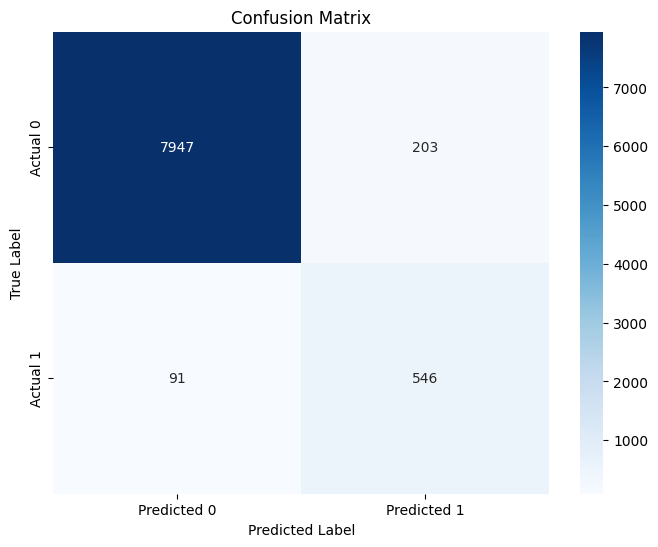

Accuracy: 96.65%
True Negatives (Predicted 0 correctly): 7947
True Positives (Predicted 1 correctly): 546
False Positives (Predicted 1 incorrectly): 203
False Negatives (Predicted 0 incorrectly): 91
filtered out: 37


In [4]:
evaluate(filename)

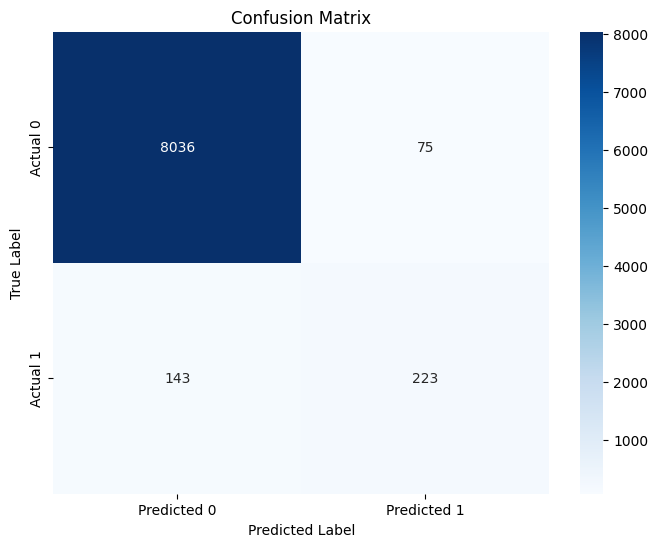

Accuracy: 97.43%
True Negatives (Predicted 0 correctly): 8036
True Positives (Predicted 1 correctly): 223
False Positives (Predicted 1 incorrectly): 75
False Negatives (Predicted 0 incorrectly): 143
filtered out: 347


In [5]:
evaluate(filenameLama)